**1901714 김미지 7주차 과제**

## 채점표

**번호**|**시각화 요구 사항**|**배점**|**자가 채점**|**비고**
:-----:|:-----:|-----:|-----:|:-----:
1|<표 1>|1.0|1.0| CCTV 데이터의 동일성 확인
2|<표 2>|1.0|1.0| 인구 데이터의 동일성 확인
3|<표 3>|1.0|1.0| 병합 데이터의 동일성 확인
4|<그림 2>|6.0|6.0|CCTV 규모 단일 막대그래프
5|<그림 8>|5.0|5.0|CCTV 비율 subplot sbs stacked
6|<그림 10>|6.0|6.0|산점도 18
7|<그림 12>|4.0|2.2|산점도 moving 15 18
8|노트북 파일 제출|1.0|1.0| -
9|CCTV 데이터 파일 제출|0.5|0.5| -
a|인구 데이터 파일 제출|0.5|0.5| -
b|소감|1.0|1.0| -
c|전체적 완성도|3.0|2.73| -
**합계**|**-**|**30.0**|**27.93**|**-**  

<br>
<그림 12> 에서 2015년 거품의 위치는 정확하게 표현되었으나, 정의서의 그림자료와 색상이 다른 버블이 있어서 1점 만점에 0.5점을 주었다. <br>
또한, 2015년 거품과 2018년 거품을 연결하는 선을 표현하는 데엔 성공하였으나, 선의 두께와 색상을 완벽하게 시각화하지 못하였다.  <br>
때문에 2점 만점에 0.7점을 주어, 총 2.2점으로 채점하였다.  <br>
마지막으로 전체적 완성도에 대해서는 채점표 11가지 항목 중 <그림 12>를 해결하지 못했기 때문에 3점 만점에 2.73점을 주었다.  <br>
따라서, 자가 채점 결과 총 27.93점으로 채점하였다.

## 데이터 획득, 정제, 적재 및 구조 변환
### 서울시 CCTV 현황

In [1]:
# 필요한 라이브러리 임포트 
import pandas as pd              # 데이터 분석 및 조작을 위해 pandas 임포트, pandas를 pd라고 부르겠다는 의미
import numpy as np               # 수치 계산을 위해 numpy 임포트, numpy를 np라고 부르겠다는 의미
import matplotlib                # 자료를 차트나 플롯을 이용하여 시각화하기 위해 matplotlib 임포트
import matplotlib.pyplot as plt  # pyplot을 plt라고 부르겠다는 의미

In [2]:
# 엑셀 파일의 데이터를 CCTV_Seoul_new 데이터 프레임으로 적재, 엑셀 파일명은 'hw07_1901714_김미지_CCTV.xlsx'
# CCTV_Seoul_new는 읽어온 데이터를 저장하는 변수명
CCTV_Seoul_new = pd.read_excel('hw07_1901714_김미지_CCTV.xlsx')
CCTV_Seoul_new.head()  # CCTV_Seoul_new의 앞 부분만 추출해서 보기 ()안에 숫자 미입력시 기본값 5

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
# CCTV_Seoul_new의 열 이름 확인 -> 인덱스로 출력됨
CCTV_Seoul_new.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [4]:
# CCTV_Seoul_new 데이터 프레임에서 index가 0번째인 값의 열이름을 '자치구'로 변경, inplace 옵션을 사용해서 원본 직접 수정
CCTV_Seoul_new.rename(columns={CCTV_Seoul_new.columns[0]: '자치구'}, inplace=True)
CCTV_Seoul_new.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [5]:
CCTV_Seoul_new.isnull().values.any()  # 널 값이 포함된 행이 존재하는지 검사

True

In [6]:
CCTV_Seoul_new.fillna(0, inplace=True)  # 널 값이 존재하므로, 결측치를 0으로 대체, 원본 직접 수정
CCTV_Seoul_new.sample(5)  # 임의로 샘플 5개만 뽑아서 보여줌

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
11,동 작 구,1780,238.0,93.0,29.0,503,130,254,278,255
20,용 산 구,2063,1279.0,152.0,201.0,107,102,89,60,73
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101


In [7]:
# 결측치를 대체한 후, '2015년 소계' 및 '2018년 소계'만을 집계하고 나머지 열은 삭제
# 2015년 소계는 2011 이전 ~ 2015년 데이터를 모두 합산한 값이 됨 / 2018 소계는 현재 소계와 데이터 동일
CCTV_Seoul_new['CCTV 규모 2015'] = (CCTV_Seoul_new['2011년 이전'] + CCTV_Seoul_new['2012년']+ CCTV_Seoul_new['2013년']
                                   + CCTV_Seoul_new['2014년'] + CCTV_Seoul_new['2015년'])
CCTV_Seoul_new['CCTV 규모 2018'] = CCTV_Seoul_new['소계'].astype(float)  # astype을 실수형으로 지정

 # 나머지 열 삭제
del CCTV_Seoul_new['소계']
del CCTV_Seoul_new['2011년 이전']
del CCTV_Seoul_new['2012년']
del CCTV_Seoul_new['2013년']
del CCTV_Seoul_new['2014년']
del CCTV_Seoul_new['2015년']
del CCTV_Seoul_new['2016년']
del CCTV_Seoul_new['2017년']
del CCTV_Seoul_new['2018년']

CCTV_Seoul_new.head()

,자치구,CCTV 규모 2015,CCTV 규모 2018
0,강 남 구,3431.0,5221.0
1,강 동 구,1027.0,1879.0
2,강 북 구,691.0,1265.0
3,강 서 구,909.0,1617.0
4,관 악 구,2001.0,3985.0


In [8]:
# 이상치 데이터 확인. '자치구' 열에 한 번이라도 나온 값을 출력
# 자치구 열을 확인. 구의 이름에 공백이 포함되어있는 것을 확인 할 수 있음
CCTV_Seoul_new['자치구'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [9]:
# 자치구 이름에 포함된 공백 ' '을 ''로 치환
CCTV_Seoul_new['자치구'] = CCTV_Seoul_new['자치구'].str.replace(' ', '')
CCTV_Seoul_new = CCTV_Seoul_new  # 수정한 결과를 원본에 다시 저장하여 원본 수정
CCTV_Seoul_new.head(3)

,자치구,CCTV 규모 2015,CCTV 규모 2018
0,강남구,3431.0,5221.0
1,강동구,1027.0,1879.0
2,강북구,691.0,1265.0


#### <표 1> 서울시 CCTV 데이터 확인
- **<표 1>**

In [10]:
# <표 1> 확인
CCTV_Seoul_new

,자치구,CCTV 규모 2015,CCTV 규모 2018
0,강남구,3431.0,5221.0
1,강동구,1027.0,1879.0
2,강북구,691.0,1265.0
3,강서구,909.0,1617.0
4,관악구,2001.0,3985.0
5,광진구,746.0,1581.0
6,구로구,1875.0,3227.0
7,금천구,769.0,1634.0
8,노원구,1342.0,1906.0
9,도봉구,515.0,858.0


### 서울시 인구 현황
#### 서울시 2015년 인구 데이터

In [11]:
# 2015년 인구데이터 파일(hw07_1901714_김미지_pop_2015.txt)을 읽어와 pop_Seoul_2015 데이터 프레임으로 적재
# pop_Seoul_2015는 읽어온 데이터를 저장하는 변수명
pop_Seoul_2015 = pd.read_table('hw07_1901714_김미지_pop_2015.txt')
pop_Seoul_2015.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2015.4/4,합계,"4,189,948","10,297,138","5,063,550","5,233,588","10,022,181","4,930,943","5,091,238","274,957","132,607","142,350",2.39,"1,267,563"
3,2015.4/4,종로구,"72,645","163,822","80,531","83,291","154,986","76,548","78,438","8,836","3,983","4,853",2.13,"24,892"
4,2015.4/4,중구,"59,321","134,329","66,755","67,574","125,733","62,687","63,046","8,596","4,068","4,528",2.12,"20,302"


In [12]:
# 옵션 변경하여 원하는 열만 다시 읽어오기
pop_Seoul_2015 = pd.read_table('hw07_1901714_김미지_pop_2015.txt',
                               sep = '\t',                  # 데이터 구분자는 탭('\t')으로 지정
                               header = 2,                  # 행 앞에 존재하는 헤더 2행을 건너 띄어 읽어옴. 즉, 3번째 줄부터 값을 저장
                               thousands = ',',             # 천단위 구분 쉼표 제거
                               usecols = [1, 3, 6, 9, 13])  # 지정한 열만 읽어옴
                                                            # : (자치구, 전체 인구수, 한국인 인구수, 외국인 인구수, 고령자 인구수)

pop_Seoul_2015.drop([0], inplace=True)  # 합계 행은 불필요하므로 삭제

pop_Seoul_2015.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,163822,154986,8836,24892
2,중구,134329,125733,8596,20302
3,용산구,247909,233342,14567,35715
4,성동구,305065,297003,8062,38164
5,광진구,375180,360369,14811,40368


In [13]:
# 열 이름 변경, 원본 직접 수정
pop_Seoul_2015.rename(columns={pop_Seoul_2015.columns[0] : '자치구',
                          pop_Seoul_2015.columns[1] : '인구 규모 2015',
                          pop_Seoul_2015.columns[2] : '한국인 2015',
                          pop_Seoul_2015.columns[3] : '외국인 2015',
                          pop_Seoul_2015.columns[4] : '고령자 2015'}, inplace=True)
pop_Seoul_2015.head()

,자치구,인구 규모 2015,한국인 2015,외국인 2015,고령자 2015
1,종로구,163822,154986,8836,24892
2,중구,134329,125733,8596,20302
3,용산구,247909,233342,14567,35715
4,성동구,305065,297003,8062,38164
5,광진구,375180,360369,14811,40368


In [14]:
pop_Seoul_2015.isnull().values.any()  # 널 값이 포함된 행이 존재하는지 검사

False

In [15]:
# '외국인비율' 및 '고령자비율' 열 계산 및 추가
pop_Seoul_2015['외국인 비율 2015'] = pop_Seoul_2015['외국인 2015'] / pop_Seoul_2015['인구 규모 2015'] * 100
pop_Seoul_2015['고령자 비율 2015'] = pop_Seoul_2015['고령자 2015'] / pop_Seoul_2015['인구 규모 2015'] * 100

pop_Seoul_2015.head()

,자치구,인구 규모 2015,한국인 2015,외국인 2015,고령자 2015,외국인 비율 2015,고령자 비율 2015
1,종로구,163822,154986,8836,24892,5.393659,15.194540
2,중구,134329,125733,8596,20302,6.399214,15.113639
3,용산구,247909,233342,14567,35715,5.875946,14.406496
4,성동구,305065,297003,8062,38164,2.642715,12.510121
5,광진구,375180,360369,14811,40368,3.947705,10.759635


#### 서울시 2018년 인구 데이터

In [16]:
# 2018년 인구데이터 파일(hw07_1901714_김미지_pop_2018.txt)을 읽어와 pop_Seoul_2018 데이터 프레임으로 적재
# pop_Seoul_2018은 읽어온 데이터를 저장하는 변수명
pop_Seoul_2018 = pd.read_table('hw07_1901714_김미지_pop_2018.txt')
pop_Seoul_2018.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.4/4,합계,"4,263,868","10,049,607","4,910,849","5,138,758","9,765,623","4,773,899","4,991,724","283,984","136,950","147,034",2.29,"1,416,131"
3,2018.4/4,종로구,"73,735","163,026","79,156","83,870","153,065","74,825","78,240","9,961","4,331","5,630",2.08,"26,742"
4,2018.4/4,중구,"61,502","135,633","66,674","68,959","125,725","61,947","63,778","9,908","4,727","5,181",2.04,"22,005"


In [17]:
# 옵션 변경하여 조건대로 원하는 열만 다시 읽어오기
pop_Seoul_2018 = pd.read_table('hw07_1901714_김미지_pop_2018.txt',
                               sep = '\t',                  # 데이터 구분자는 탭('\t')으로 지정
                               header = 2,                  # 행 앞에 존재하는 헤더 2행을 건너 띄어 읽어옴
                               thousands = ',',             # 천단위 구분 쉼표 제거
                               usecols = [1, 3, 6, 9, 13])  # 지정한 열만 읽어옴
                                                            # : (자치구, 전체 인구수, 한국인 인구수, 외국인 인구수, 고령자 인구수)

pop_Seoul_2018.drop([0], inplace=True)  # 합계 행은 불필요하므로 삭제

pop_Seoul_2018.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [18]:
# 해당 인덱스 값을 가진 열 이름을 변경, 원본 직접 수정
pop_Seoul_2018.rename(columns={pop_Seoul_2018.columns[0] : '자치구',
                          pop_Seoul_2018.columns[1] : '인구 규모 2018',
                          pop_Seoul_2018.columns[2] : '한국인 2018',
                          pop_Seoul_2018.columns[3] : '외국인 2018',
                          pop_Seoul_2018.columns[4] : '고령자 2018'}, inplace=True)
pop_Seoul_2018.head()

,자치구,인구 규모 2018,한국인 2018,외국인 2018,고령자 2018
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [19]:
pop_Seoul_2018.isnull().values.any()  # 널 값이 포함된 행이 존재하는지 검사

False

In [20]:
# 널 값 없음을 확인. '외국인비율' 및 '고령자비율' 열 계산 및 추가
pop_Seoul_2018['외국인 비율 2018'] = pop_Seoul_2018['외국인 2018'] / pop_Seoul_2018['인구 규모 2018'] * 100
pop_Seoul_2018['고령자 비율 2018'] = pop_Seoul_2018['고령자 2018'] / pop_Seoul_2018['인구 규모 2018'] * 100

pop_Seoul_2018.head()

,자치구,인구 규모 2018,한국인 2018,외국인 2018,고령자 2018,외국인 비율 2018,고령자 비율 2018
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


#### <표 2> 서울시 인구 데이터 병합
- **<표 2>**

In [21]:
# '자치구' 열을 key 열로 지정하여 2015년 인구 데이터와 2018년 인구 데이터를 병합하여 'pop_Seoul_new' 데이터프레임으로 적재
# 옵션을 outer로 지정하여 두 데이터프레임에 존재하는 모든 데이터를 합친다. 
pop_Seoul_new = pd.merge(pop_Seoul_2015, pop_Seoul_2018, on='자치구', how='outer')
pop_Seoul_new  # <표 2> 확인

,자치구,인구 규모 2015,한국인 2015,외국인 2015,고령자 2015,외국인 비율 2015,고령자 비율 2015,인구 규모 2018,한국인 2018,외국인 2018,고령자 2018,외국인 비율 2018,고령자 비율 2018
0,종로구,163822,154986,8836,24892,5.393659,15.194540,163026,153065,9961,26742,6.110068,16.403518
1,중구,134329,125733,8596,20302,6.399214,15.113639,135633,125725,9908,22005,7.305007,16.223928
2,용산구,247909,233342,14567,35715,5.875946,14.406496,245090,228999,16091,37640,6.565343,15.357624
3,성동구,305065,297003,8062,38164,2.642715,12.510121,316463,308221,8242,42767,2.604412,13.514060
4,광진구,375180,360369,14811,40368,3.947705,10.759635,371063,355559,15504,45619,4.178266,12.294139
5,동대문구,373824,360153,13671,52490,3.657069,14.041367,364338,348052,16286,57165,4.470025,15.690101
6,중랑구,418620,413909,4711,54095,1.125364,12.922221,408147,403209,4938,61830,1.209858,15.148954
7,성북구,469560,459275,10285,63281,2.190348,13.476659,447687,435868,11819,67782,2.640014,15.140489
8,강북구,334426,330873,3553,52598,1.062417,15.727844,322915,319164,3751,58196,1.161606,18.022080
9,도봉구,353241,351242,1999,48590,0.565903,13.755481,341649,339413,2236,55964,0.654473,16.380554


### <표 3> CCTV 데이터와 인구 데이터의 병합
- **<표 3>**

In [22]:
# '자치구' 열을 key 열로 지정하여 CCTV 데이터와 인구 데이터 병합하여 'cctv_with_pop' 데이터 프레임으로 적제
# 옵션을 outer로 지정하여 두 데이터프레임에 존재하는 모든 데이터를 합친다. 
cctv_with_pop = pd.merge(pop_Seoul_new, CCTV_Seoul_new, on='자치구', how='outer')
cctv_with_pop.set_index('자치구', inplace=True)  # 자치구 열을 인덱스로 지정, 원본까지 수정
cctv_with_pop.sample(5)  # <표 3> 확인

,인구 규모 2015,한국인 2015,외국인 2015,고령자 2015,외국인 비율 2015,고령자 비율 2015,인구 규모 2018,한국인 2018,외국인 2018,고령자 2018,외국인 비율 2018,고령자 비율 2018,CCTV 규모 2015,CCTV 규모 2018
자치구,,,,,,,,,,,,,,
광진구,375180,360369,14811,40368,3.947705,10.759635,371063,355559,15504,45619,4.178266,12.294139,746.0,1581.0
강남구,581760,576495,5265,60330,0.905012,10.370256,547453,542364,5089,67085,0.929578,12.254020,3431.0,5221.0
서초구,451258,446764,4494,49280,0.995883,10.920582,438163,433951,4212,54751,0.961286,12.495578,1840.0,2835.0
은평구,502578,497920,4658,69753,0.926821,13.879040,487666,483197,4469,77420,0.916406,15.875620,2070.0,2962.0
강서구,595691,589074,6617,67950,1.110811,11.406921,603611,596949,6662,79660,1.103691,13.197241,909.0,1617.0


## CCTV 규모 시각화
### 연도별로 개별 차트 시각화
#### <그림 1>  2015 서울시 CCTV 설치 규모 시각화

In [23]:
# 한글 폰트 지정
import platform 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

In [24]:
# 차트로 시각화 하기 전에 차트의 ytick을 자치구로 표시하기 위해서 인덱스를 '자치구'로 새로 지정
CCTV_Seoul_new.set_index('자치구', inplace=True)
CCTV_Seoul_new.head(3)  # 인덱스 변경 결과 확인

,CCTV 규모 2015,CCTV 규모 2018
자치구,,
강남구,3431.0,5221.0
강동구,1027.0,1879.0
강북구,691.0,1265.0


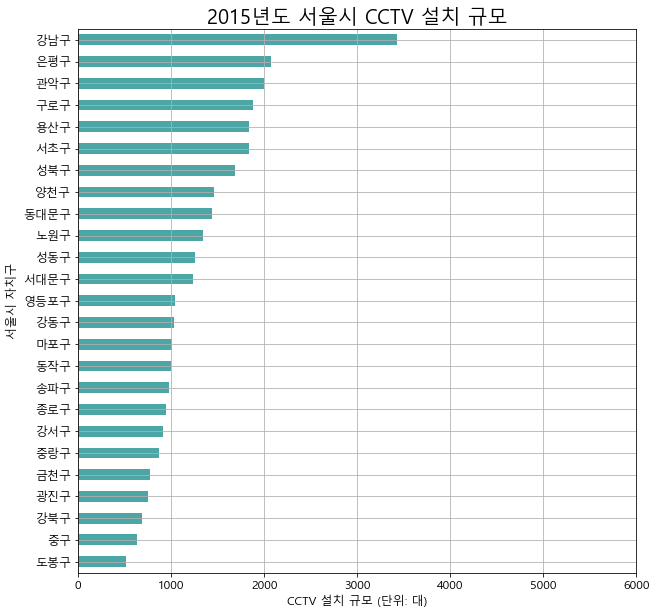

In [25]:
# 2015년도 CCTV 설치 규모 시각화
# 'barh' -> 수평 막대, grid 표시, 사이즈, 색상, 투명도, 글자크기 지정
# ascending 값이 True는이면 오름차순, False면 내림차순 정렬

CCTV_Seoul_new['CCTV 규모 2015'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, figsize=(10, 10), color="teal", alpha=0.7, fontsize=12)

plt.xlim(0, 6000)                                         # x축 범위 설정 (0 ~ 6000)
plt.ylabel('서울시 자치구', fontsize=12)                  # y레이블 지정, 글자크기 12
plt.xlabel('CCTV 설치 규모 (단위: 대)', fontsize=12)      # x레이블 지정, 글자크기 12
plt.title('2015년도 서울시 CCTV 설치 규모', fontsize=20)  # 차트 제목 지정, 글자크기 20
plt.show()

#### <그림 2> 2018 서울시 CCTV 설치 규모 시각화

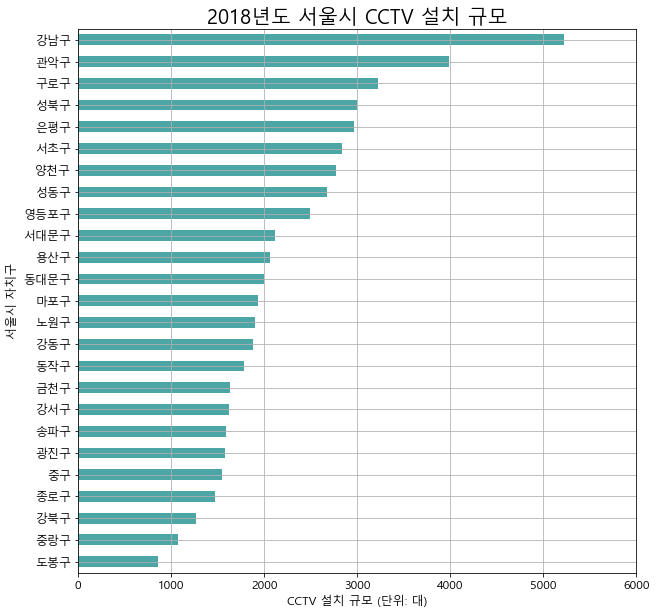

In [26]:
# 2018년도 CCTV 설치 규모 시각화
# 'barh' -> 수평 막대, grid 표시, 사이즈, 색상, 투명도, 글자크기 지정
# ascending 값이 True는이면 오름차순, False면 내림차순 정렬

CCTV_Seoul_new['CCTV 규모 2018'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, figsize=(10, 10), color="teal", alpha=0.7, fontsize=12)

plt.xlim(0, 6000)                                         # x축 범위 설정 (0 ~ 6000)
plt.ylabel('서울시 자치구', fontsize=12)                  # y레이블 지정, 글자크기 12
plt.xlabel('CCTV 설치 규모 (단위: 대)', fontsize=12)      # x레이블 지정, 글자크기 12
plt.title('2018년도 서울시 CCTV 설치 규모', fontsize=20)  # 차트 제목 지정, 글자크기 20
plt.show()

#### <그림 3> 두 차트를 subplot을 활용하여 단일 그림으로 시각화

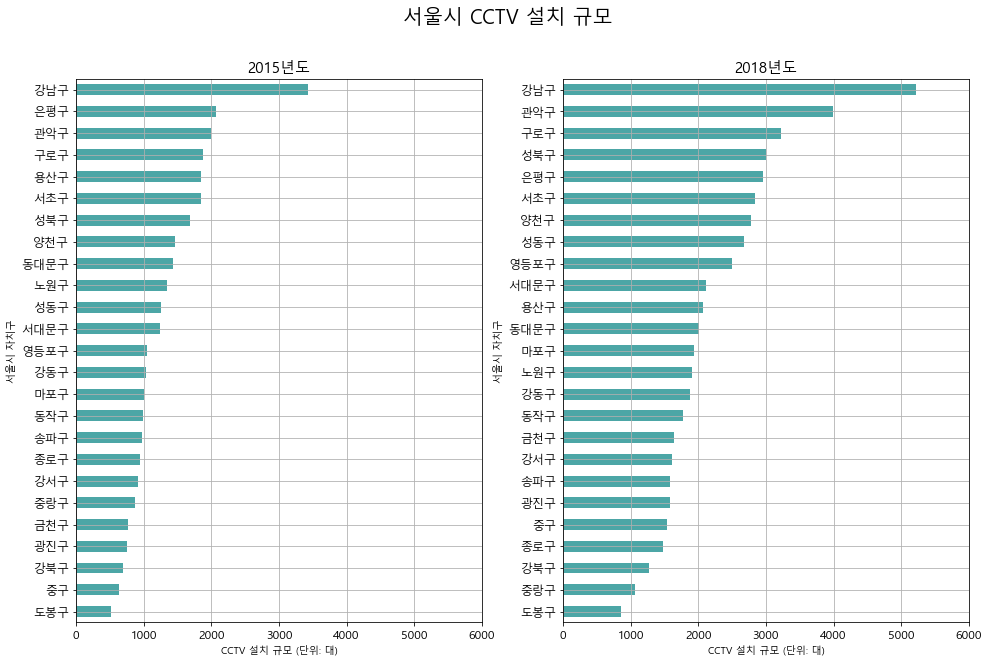

In [27]:
# df.plot()으로 subplot 작성

fig = plt.figure(figsize=(16,10))
fig.suptitle('서울시 CCTV 설치 규모', fontsize=20)

# 왼쪽에 2015년도 CCTV 설치 규모 시각화, 'CCTV 규모 2015'열을 기준으로 정렬
ax1 = fig.add_subplot(121)  # 1행 2열 중에 1번째 차트
ax1.set_title('2015년도', fontsize=15)
CCTV_Seoul_new['CCTV 규모 2015'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, color="teal", alpha=0.7, fontsize=12)
plt.xlim(0, 6000)
plt.ylabel('서울시 자치구')
plt.xlabel('CCTV 설치 규모 (단위: 대)') 

# 오른쪽에 2018년도 CCTV 설치 규모 시각화, 'CCTV 규모 2018'열을 기준으로 정렬
ax2 = fig.add_subplot(122)  # 1행 2열 중에 2번째 차트
ax2.set_title('2018년도', fontsize=15)
CCTV_Seoul_new['CCTV 규모 2018'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, color="teal", alpha=0.7, fontsize=12)
plt.xlim(0, 6000)
plt.ylabel('서울시 자치구')
plt.xlabel('CCTV 설치 규모 (단위: 대)')

plt.show()

### 두 연도를 단일 차트로 시각화
#### <그림 4> 나란히 놓은 단일 차트

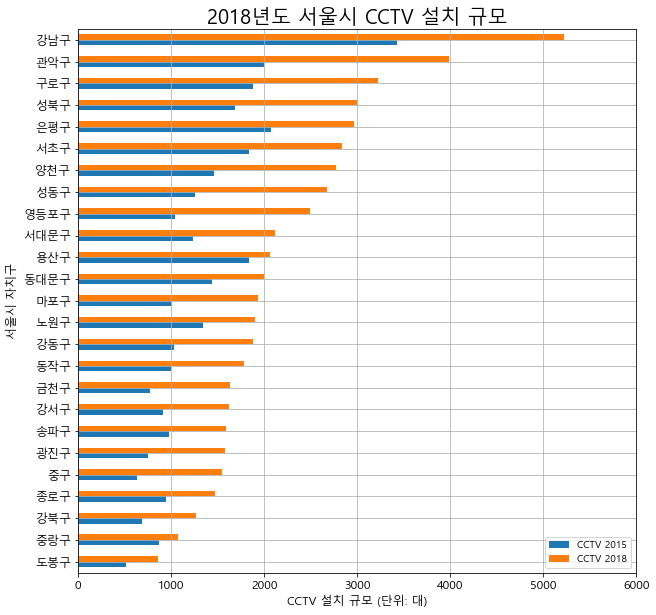

In [28]:
# 단일 차트화 하기 위한 준비
# 막대로 사용할 데이터 열만 가지는 데이터 프레임 생성
CCTV_Double = CCTV_Seoul_new.loc[:, ['CCTV 규모 2015', 'CCTV 규모 2018']]

# 범례에 표시할 이름으로 데이터 열의 이름 변경, 원본까지 수정
CCTV_Double.rename(columns={CCTV_Double.columns[0] : 'CCTV 2015',
                            CCTV_Double.columns[1] : 'CCTV 2018'}, inplace=True)

# 차트의 Y 축 레이블 순서를 정렬하기 위하여 'CCTV 2018'열을 기준으로 정렬
CCTV_Double = CCTV_Double.sort_values(by="CCTV 2018", ascending=True)

# 차트 시각화
CCTV_Double.plot(kind='barh', grid=True, figsize=(10, 10), fontsize=12)

plt.xlim(0, 6000)                                         # x축 범위 설정 (0 ~ 6000)
plt.ylabel('서울시 자치구', fontsize=12)                  # y레이블 지정, 글자크기 12
plt.xlabel('CCTV 설치 규모 (단위: 대)', fontsize=12)      # x레이블 지정, 글자크기 12
plt.title('2018년도 서울시 CCTV 설치 규모', fontsize=20)  # 차트 제목 지정, 글자크기 20
plt.show()

#### <그림 5> 쌓아올린 단일 차트

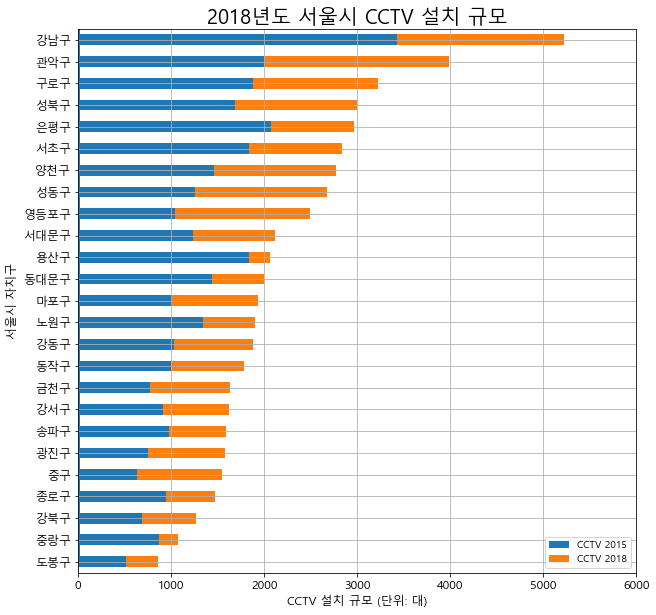

In [29]:
# 막대롤 쌓아올리기 위해 CCTV 2018의 데이터는 2015년도 수치 대비 증가한 양으로 처리
CCTV_Double['CCTV 2018'] = CCTV_Double['CCTV 2018'] - CCTV_Double['CCTV 2015']

# 차트 시각화
CCTV_Double.plot(kind='barh', stacked=True, grid=True, figsize=(10, 10), fontsize=12)

plt.bar(range(len(CCTV_Double['CCTV 2015'])), CCTV_Double['CCTV 2015']) 
plt.bar(range(len(CCTV_Double['CCTV 2018'])), CCTV_Double['CCTV 2018'], bottom=CCTV_Double['CCTV 2015'])

plt.xlim(0, 6000)                                         # x축 범위 설정 (0 ~ 6000)
plt.ylabel('서울시 자치구', fontsize=12)                  # y레이블 지정, 글자크기 12
plt.xlabel('CCTV 설치 규모 (단위: 대)', fontsize=12)      # x레이블 지정, 글자크기 12
plt.title('2018년도 서울시 CCTV 설치 규모', fontsize=20)  # 차트 제목 지정, 글자크기 20
plt.show()

#### <그림 8> 두 차트를 subplot을 활용하여 단일 그림으로 시각화
- **<그림 8> 인구 백명당 CCTV 비율을 연도를 통합하여 단일 차트로 시각화**

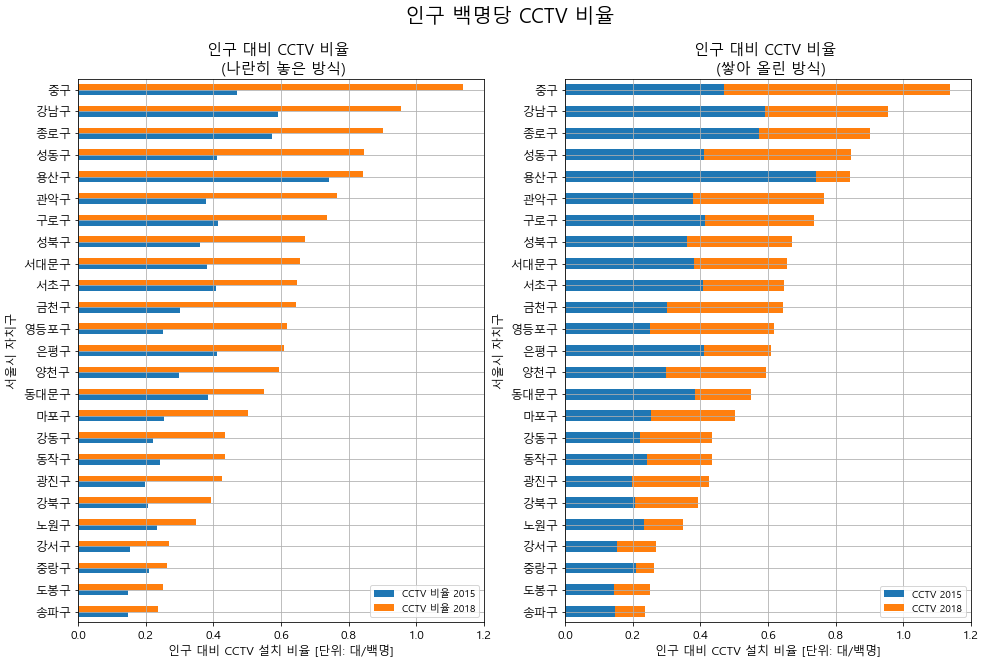

In [30]:
# 막대로 사용할 데이터 열만 가지는 데이터 프레임 생성
CCTV_Ratio = cctv_with_pop.loc[:, ['CCTV 규모 2015', 'CCTV 규모 2018', '인구 규모 2015', '인구 규모 2018']]

#  인구 백명당 CCTV 비율 구하기
CCTV_Ratio['CCTV 비율 2015'] = CCTV_Ratio['CCTV 규모 2015'] / CCTV_Ratio['인구 규모 2015'] * 100
CCTV_Ratio['CCTV 비율 2018'] = CCTV_Ratio['CCTV 규모 2018'] / CCTV_Ratio['인구 규모 2018'] * 100

# 필요한 열만 남기고 나머지 열 삭제
del CCTV_Ratio['CCTV 규모 2015']
del CCTV_Ratio['CCTV 규모 2018']
del CCTV_Ratio['인구 규모 2015']
del CCTV_Ratio['인구 규모 2018']

# 차트의 Y 축 레이블 순서를 정렬하기 위하여 'CCTV 비율 2018'열을 기준으로 정렬
CCTV_Ratio.sort_values(by="CCTV 비율 2018", ascending=True, inplace=True)

CCTV_Ratio1 = CCTV_Ratio
CCTV_Ratio2 = CCTV_Ratio

# df.plot()으로 subplot 작성
fig = plt.figure(figsize=(16,10))
fig.suptitle('인구 백명당 CCTV 비율', fontsize=20)


# 1. 왼쪽에 나란히 놓은 방식 시각화
ax = fig.add_subplot(121)  # 1행 2열 중에 1번째 차트
ax.set_title('인구 대비 CCTV 비율 \n (나란히 놓은 방식)', fontsize=15)

CCTV_Ratio1.plot(ax=ax, kind='barh', grid=True, fontsize=12)

plt.xlim(0.0, 1.2)                                                   # x축 범위 설정
plt.ylabel('서울시 자치구', fontsize=12)                             # y레이블 지정, 글자크기 12
plt.xlabel('인구 대비 CCTV 설치 비율 [단위: 대/백명]', fontsize=12)  # x레이블 지정, 글자크기 12


# 2. 오른쪽에 쌓아올린 방식 시각화
ax = fig.add_subplot(122)  # 1행 2열 중에 2번째 차트
ax.set_title('인구 대비 CCTV 비율 \n (쌓아 올린 방식)', fontsize=15)

# 범례에 표시할 이름으로 데이터 열의 이름 변경, 원본까지 수정
CCTV_Ratio2.rename(columns={CCTV_Ratio2.columns[0] : 'CCTV 2015',
                            CCTV_Ratio2.columns[1] : 'CCTV 2018'}, inplace=True)

# 막대롤 쌓아올리기 위해 CCTV 2018의 데이터는 2015년도 수치 대비 증가한 양으로 처리
CCTV_Ratio2['CCTV 2018'] = CCTV_Ratio2['CCTV 2018'] - CCTV_Ratio2['CCTV 2015']

# 차트 시각화
CCTV_Ratio2.plot(ax=ax, kind='barh', grid=True, fontsize=12, stacked=True)


plt.bar(len(CCTV_Ratio2['CCTV 2015']), CCTV_Ratio2['CCTV 2015']) 
plt.bar(len(CCTV_Ratio2['CCTV 2018']), CCTV_Ratio2['CCTV 2018'], bottom=CCTV_Ratio2['CCTV 2015'])


plt.xlim(0.0, 1.2)                                    # x축 범위 설정 (0.0 ~ 1.2)
plt.ylabel('서울시 자치구', fontsize=12)              # y레이블 지정, 글자크기 12
plt.xlabel('인구 대비 CCTV 설치 비율 [단위: 대/백명]', fontsize=12)  # x레이블 지정, 글자크기 12
plt.legend(loc='lower right')                         # 범례 위치는 오른쪽 아래로 조정

plt.show()

## 인구-CCTV 산점도
### <그림 10> 연도별로 개별 차트 시각화
- **<그림 10> 2018년도 기준 인구 - CCTV 규모 산점도**

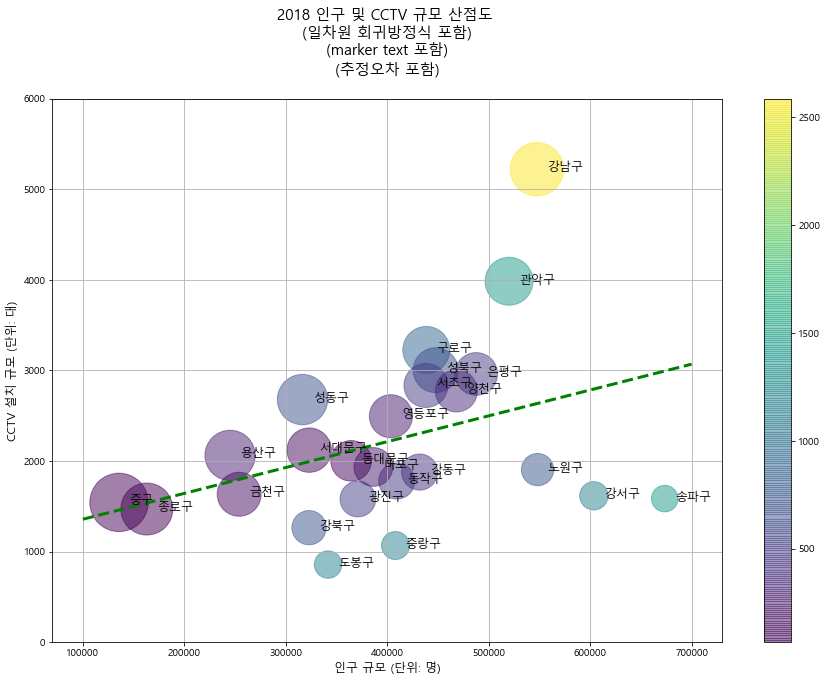

In [31]:
# 2018년도 CCTV 비율을 계산하여 'CCTV 비율 2018' 열 생성
cctv_with_pop['CCTV 비율 2018'] = cctv_with_pop['CCTV 규모 2018'] / cctv_with_pop['인구 규모 2018'] * 100

# 기울기, y절편 구하기 
pf = np.polyfit(cctv_with_pop['인구 규모 2018'],  # 추정에 사용할 x 좌표 값
                cctv_with_pop['CCTV 규모 2018'],  # 추정에 사용할 y 좌표 값
                1)                                # 1차원(직선 형태) 다항식

# y축, 직선의 식
fy = np.poly1d(pf)

# x축의 범위와 간격 설정,10만~70만 사이의 범위를 100개의 구간으로 나누어서 x값을 정하라는 뜻
fx = np.linspace(100000, 700000, 100)
   
# 직선과 점 사이의 y축 거리 구하기 - 추정오차 구하기
cctv_with_pop['오차'] = np.abs(
    cctv_with_pop['CCTV 규모 2018'] - fy(cctv_with_pop['인구 규모 2018'])
)

# 오차를 기준으로 내림차순으로 정렬하여 CCTV_Sort로 저장
CCTV_Sort = cctv_with_pop.sort_values(by='오차', ascending=False)

# 인구 대비 CCTV 설치 수량으로 산점도 그리기
plt.figure(figsize=(15, 10))
plt.scatter(CCTV_Sort['인구 규모 2018'],             # x 좌표 
            CCTV_Sort['CCTV 규모 2018'],             # y 좌표 
            c = CCTV_Sort['오차'],                   # 마커의 색상 지정
            s = CCTV_Sort['CCTV 비율 2018'] * 3000,  # 마커의 크기 지정, 모두 동일하게 3000씩 곱해주어 크기 확대
            alpha=0.5)                               # 투명도

# 마커 옆에 자치구 이름 출력 하기
for n in range(len(CCTV_Sort)):                      # 'CCTV_Sort'행 개수만큼 반복 -> 자치구의 개수만큼 루프를 돌림
    plt.text(CCTV_Sort['인구 규모 2018'][n] + 10000,  # 텍스트를 마커 위치 x보다 약간 오른쪽에 표시
             CCTV_Sort['CCTV 규모 2018'][n] - 20,     # 텍스트를 마커 위치 y보다 약간 아래쪽에 표시
             CCTV_Sort.index[n],                      # 구 이름 출력
             fontsize=12)                             # 폰트 크기
    
# fy(fx) -> fx를 fy에 적용시킨 값으로 차트를 그리겠단 뜻
# ls='dashed' -> line style(라인 형태)을 dashed로 지정, lw=3 -> line width(라인의 두께)는 3 정도 (1로 하면 더 얇아짐)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')

plt.colorbar() # 색상 조견 막대 (수직 방향이 기본값)

plt.title('2018 인구 및 CCTV 규모 산점도 \n (일차원 회귀방정식 포함) \n (marker text 포함) \n (추정오차 포함) \n', fontsize=15)                # 차트 제목 지정
plt.ylim(0, 6000)                                      # y축 범위 설정 (0 ~ 6000)
plt.xlabel('인구 규모 (단위: 명)',  fontsize=12)       # x레이블, 폰트 크기 지정
plt.ylabel('CCTV 설치 규모 (단위: 대)',  fontsize=12)  # y레이블, 폰트 크기 지정
plt.grid()                                             # 그리드 표시
plt.show()

### <그림 12> 두 연도를 단일 차트로 시각화
- **<그림 12> 2015년도 산점도와 2018년도 산점도를 통합하여 단일 차트로 시각화**

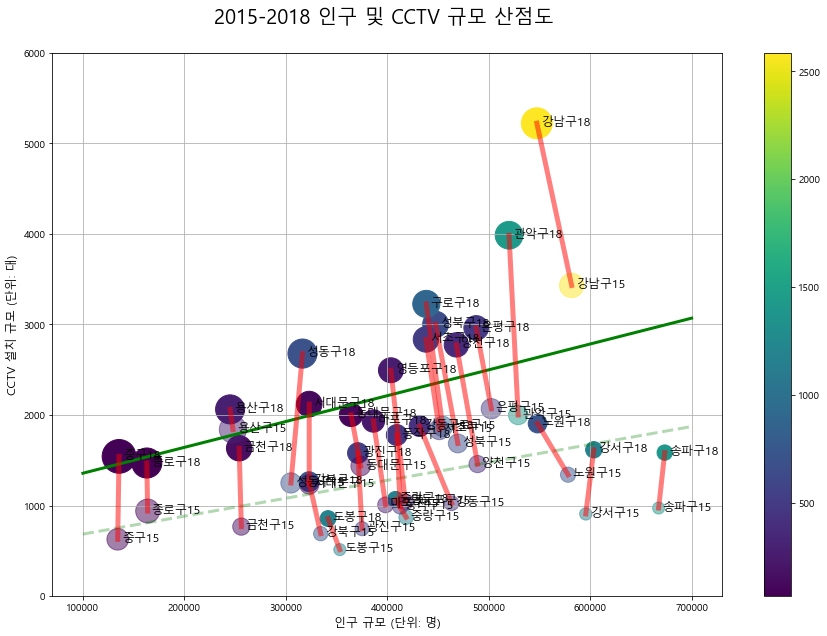

In [33]:
# CCTV 비율을 계산하여 각각 'CCTV 비율 2018', 'CCTV 비율 2015' 열 생성
cctv_with_pop['CCTV 비율 2018'] = cctv_with_pop['CCTV 규모 2018'] / cctv_with_pop['인구 규모 2018'] * 100
cctv_with_pop['CCTV 비율 2015'] = cctv_with_pop['CCTV 규모 2015'] / cctv_with_pop['인구 규모 2015'] * 100

# 사용할 각 데이터 값을 x1, x2, y1, y2로 지정
x1 = cctv_with_pop['인구 규모 2018']
x2 = cctv_with_pop['인구 규모 2015']
y1 = cctv_with_pop['CCTV 규모 2018']
y2 = cctv_with_pop['CCTV 규모 2015']

# # 기울기, y절편 구하기 - np.polyfit (추정에 사용할 x 좌표 값, 추정에 사용할 y 좌표 값, 1차원(직선 형태) 다항식)
pf1 = np.polyfit(x1, y1, 1)
pf2 = np.polyfit(x2, y2, 1)


# y축, 직선의 식
fy1 = np.poly1d(pf1)  # 2018
fy2 = np.poly1d(pf2)  # 2015

# x축의 범위와 간격 설정, 10만~70만 사이의 범위를 100개 구간으로 나누어서 x값을 정하라는 뜻
fx1 = np.linspace(100000, 700000, 100)  # 2018
fx2 = np.linspace(100000, 700000, 100)  # 2015

    
# 직선과 점 사이의 y축 거리 구하기 - 추정오차 구하기
cctv_with_pop['2018 오차'] = np.abs(x1 - fy1(y1))
cctv_with_pop['2015 오차'] = np.abs(x2 - fy2(y2))

# 각 년도별 오차를 기준으로 내림차순으로 정렬하여 CCTV_Sort_2018 / CCTV_Sort_2015로 저장
CCTV_Sort_2018 = cctv_with_pop.sort_values(by='2018 오차', ascending=False)
CCTV_Sort_2015 = cctv_with_pop.sort_values(by='2015 오차', ascending=False)


# 인구 대비 CCTV 설치 수량으로 산점도 그리기
plt.figure(figsize=(15, 10))

# 2018 산점도
plt.scatter(CCTV_Sort_2018['인구 규모 2018'],             # x 좌표 
            CCTV_Sort_2018['CCTV 규모 2018'],             # y 좌표 
            c = CCTV_Sort_2018['오차'],                   # 마커의 색상 지정
            s = CCTV_Sort_2018['CCTV 비율 2018'] * 1000)  # 마커의 크기 지정, 모두 동일하게 1000씩 곱해주어 크기 확대 
plt.colorbar() # 색상 조견 막대 (수직 방향이 기본값)

# 2015 산점도
plt.scatter(CCTV_Sort_2015['인구 규모 2015'],             # x 좌표 
            CCTV_Sort_2015['CCTV 규모 2015'],             # y 좌표 
            c = CCTV_Sort_2015['오차'],                   # 마커의 색상 지정
            s = CCTV_Sort_2015['CCTV 비율 2015'] * 1000,  # 마커의 크기 지정, 모두 동일하게 1000씩 곱해주어 크기 확대 
            alpha=0.5)                                    # 투명도


# 마커 옆에 자치구 이름 출력 하기

# 2018 자치구 이름 출력
for n in range(len(CCTV_Sort_2018)):                     # 'CCTV_Sort_2018'행 개수만큼 반복 -> 자치구의 개수만큼 루프를 돌림
    plt.text(CCTV_Sort_2018['인구 규모 2018'][n] + 4000,  # 텍스트를 마커 위치 x보다 약간 오른쪽에 표시
             CCTV_Sort_2018['CCTV 규모 2018'][n] - 20,    # 텍스트를 마커 위치 y보다 약간 아래쪽에 표시
             CCTV_Sort_2018.index[n] + '18',              # 구 이름 출력, 년도 표시를 하기 위해 이름마다 옆에 18을 출력
             fontsize=12)                                 # 폰트 크기 10

# 2015 자치구 이름 출력
for n in range(len(CCTV_Sort_2015)):                     # CCTV_Sort_2015'행 개수만큼 반복 -> 자치구의 개수만큼 루프를 돌림
    plt.text(CCTV_Sort_2015['인구 규모 2015'][n] + 4000,  # 텍스트를 마커 위치 x보다 약간 오른쪽에 표시
             CCTV_Sort_2015['CCTV 규모 2015'][n] - 20,    # 텍스트를 마커 위치 y보다 약간 아래쪽에 표시
             CCTV_Sort_2015.index[n] + '15',              # 구 이름 출력, 년도 표시를 하기 위해 이름마다 옆에 15를 출력
             fontsize=12)                                 # 폰트 크기 10
    
    
# 2018년, 2015년 각 추세선 그리기     
plt.plot(fx1, fy1(fx1), ls='solid', lw=3, color='g')
plt.plot(fx2, fy2(fx2), ls='dashed', lw=3, color='g', alpha=0.3)  # 2015년도 추세선만 투명도를 지정하여 2018년도와 구분을 줌
# fy(fx) -> fx를 fy에 적용시킨 값으로 차트를 그리겠단 뜻
# ls='dashed' -> line style(라인 형태)을 dashed로 지정, lw=3 -> line width(라인의 두께)는 3 정도 (1로 하면 더 얇아짐)


# 2015년도 버블에서 2018년도 버블로 이동 궤적을 표시하는 선을 시각화
plt.plot([x1, x2], [y1, y2], color='r', lw=5, alpha=0.5)


plt.title('2015-2018 인구 및 CCTV 규모 산점도 \n', fontsize=20)
plt.ylim(0, 6000)                                      # y축 범위 설정 (0 ~ 6000)
plt.xlabel('인구 규모 (단위: 명)',  fontsize=12)       # x레이블, 폰트 크기 지정
plt.ylabel('CCTV 설치 규모 (단위: 대)',  fontsize=12)  # y레이블, 폰트 크기 지정
plt.grid()                                             # 그리드 표시
plt.show()

## 시사점 및 소감

<br>

- **시사점**  

2015년도 기준 CCTV 설치 수로만 봤을 때 강남구, 은평구, 관악구 등은 서울시 전체 지역보다 CCTV가 많이 설치된 편인 걸 알 수 있다.  
2018년도 기준 CCTV 설치 수로만 봤을 때는 은평구가 5위로 떨어지고 강남구, 관악구, 구로구가 순위를 차지한 것을 알 수 있다.  

그런데 인구 대비 CCTV 비율과 비교해봤을 때 위의 자치구들이 여전히 상위권일까?  
그렇지 않다. 인구 백명 당 CCTV 설치 규모를 구해봤을 때 2015년도에는 용산구가 월등히 높고 그 뒤로 강남구와 종로구가 따라오는 걸 확인할 수 있었다. 강남구가 단순히 CCTV 수로는 1위 였지만 인구 수와 같이 비율로 따져보았을 땐 2등으로 떨어지는 결과를 볼 수 있었다. 하지만 여전히 강남구가 상위권이라는 사실은 변치 않았다. 2018년도 기준 인구 백명 당 CCTV 비율을 확인했을 때는 중구가 확연하게 높아졌다는 것을 알 수 있었고, 2015년도와 마찬가지로 강남구와 종로구가 뒤따라오고 있었다. 또한, 하위권인 송파구, 도봉구, 중랑구는 크게 차이 없이 여전히 하위권인 것도 확인할 수 있었다.  

3년 사이에 중구의 CCTV 비율이 확 증가했다는 점은 주목할만 하다. 어떠한 요소가 작용했을지는 자세히 알 수 없지만, 아마도 범죄 발생 빈도수와 관련이 있지 않을까 추측해본다.

<br>
 
- **소감**  

우선 과제를 끝냈다는 안도감이 든다. 처음 과제를 확인했을 때 이걸 내가 해결할 수 있을까 걱정이 들었다.  
다른 과목들은 평상시 과제도 매주 올라오는 상황에서 중간고사 기간인 만큼 해야할 과제들이 많았고, 시간에 쫓기고 싶지 않아 무작정 달려들고 과제 수행을 시작해보았다. 과제 정의서를 차근차근 읽어가며 어떻게 데이터를 수집하고 분석하고 변환할지를 생각해보았다. 어렵긴 했지만 차분히 생각하다보니 답을 찾을 수 있었고, 그럴 때마다 엄청난 희열을 느낄 수 있었다. 

과제를 수행하며 8주 동안 배운 수업 내용의 전체적인 흐름을 파악할 수 있었고, 내가 미처 놓쳤던 부분들이나, 제대로 이해하지 못했던 부분들을 되돌아 보며 익힐 수 있었다. 과제를 수행하면서 확연히 느꼈던 점은 나란히 놓은 방식과 쌓아올리는 방식으로 차트를 만드니 두 년도의 데이터 비교가 더 쉬웠고, 또 서브플롯으로 두 차트를 나란히 만드니 두 방식의 차이점을 확 느낄 수 있었다. 년도에 따른 데이터 비교에 중점을 둔다면 나란히 놓은 방식이 더 용이해보였고, 누적되는 데이터의 변화에 중점을 둔다면 쌓아올리는 방식이 더 용이해보였다.

과제를 해결하면서 잘하고 싶다는 마음은 가득하지만, 내 뜻대로 잘 되지 않아 힘든 점도 많았다. 정의서의 요구대로 완벽하게 해결하지 못한 부분도 있었다. 최선을 다하긴 했지만, 내가 해결하지 못한 부분이 있어서 아쉽고 미련이 남는다. 그래도 이만큼 과제를 해결했다는 점이 뿌듯하다. 과제는 아쉽게도 이렇게 마무리 하지만, 해결하지 못한 부분에 대한 해답이 무척이나 궁금하고 알고 싶다. 